# Name: Falak Jain

# Problem Set 4 

### Learning Objective:

- Create Python code to automate a given task.

### Overview:

This problem set assesses your algorithmic thinking, which is the focus of weeks 3 and 4. For each problem, you are required to go through all four steps of algorithmic thinking. See the sample solutions to Exercises 3.3, 4.2 and 4.3 for examples of the desired format of your responses.

### Grading

There are three possible scores you can get from submitting this assignment on time (submitting a blank file or one without any apparent effort does not count). Note that the rubric is designed to incentivize you to go for 100% mastery of the material, as the little details matter a lot in programming. 

| Grade | Description |
|--|--|
| 5 out of 5 | Perfect submission with no significant errors. | 
| 4 out of 5 | Near perfect submission with one or more significant errors. |
| 2 out of 5 | Apparent effort but far from perfect. |

## Q1. Optimal Stocking Level

Write a function named `optBaseStock` with four input arguments:

- `levelList`: a list of possible stocking levels to optimize over (which can be a `range` instead of a `list`).
- `demandList`: a list of demand scenarios. 
- `underage`: the unit cost of having too little inventory to meet demand.
- `overage`: the unit cost of having too much inventory.

For each possible stocking level, the function should compute the average inventory cost, which is defined as the average over all demand scenarios of the total underage cost plus the total overage cost. For example, if the stocking level is 10, the demand scenarios are `[6,12,14]`, the underage cost is 9 and the overage is 5, then

- The inventory cost for the scenario `demand=6` is $(10-6)\times 5=20$, because the stocking level is 4 units too high. (The overage cost of 5/unit is applied when the inventory is too high.)
- The inventory cost for the scenario `demand=12` is $(12-10)\times 9=18$, because the stocking level is 2 units too low. (The underage cost of 9/unit is applied when the inventory is too low.) 
- The inventory cost for the scenario `demand=14` is $(14-10)\times 9=36$, because the stocking level is 4 units too low. 

The average inventory cost for stocking level 10 is $(20+18+36)/3=74/3\approx 24.67$.  

The function should return two objects:

- `bestLevel`: the stocking level in `levelList` that achieves the minimum average inventory cost (if there is a tie, return the smallest stocking level that yields the minimum cost).
- `avCost`: a dictionary that maps each stocking level to the corresponding average inventory cost.

**Sample run:**

```python
demandList=[10,18,5,20,16,30,15,3,5,10]
levelList=range(0,30,5)
underage=10
overage=3
bestLevel,avCost=optBaseStock(levelList,demandList,underage,overage)
print('bestLevel:',bestLevel)
print('avCost:',avCost)
```

**Correct output:**

```
bestLevel 20
avCost {0: 132.0, 5: 84.6, 10: 54.1, 15: 36.6, 20: 33.4, 25: 41.9}
```

### Applying Algorithmic Thinking:

**Step 1. Understand** (Write your summary of the task in this cell:)

Given a list of stockinglevels, find the inventory cost for each stocking level using the overage and underage cost along with the demand scenarios. Store the inventory cost in a dictionary and find the best stocking level where the inventory cost is lowesst

**Step 2. Decompose** (Write your instructions in this Markdown cell)

- Select a particular stocking level in levelList.
- Using the underage cost, overage cost and demandList, find the inventory cost for all the demand scenarios
- Store the inventory cost for every stocking level in a dictionary with the stocking level as key and inventory cost as value.
- Find the key with the lowest inventory cost and that is termed the optimum stocking level

**Step 3. Analyze** (Write code fragments in separate code cells to implement the trickiest steps)

In [1]:
demandList=[10,18,5,20,16,30,15,3,5,10]
levelList=range(0,30,5)
underage=10
overage=3
for demand in demandList:
    print(demand)

10
18
5
20
16
30
15
3
5
10


In [2]:
demandList=[10,18,5,20,16,30,15,3,5,10]
levelList=range(0,30,5)
underage=10
overage=3
for level in levelList:
    for demand in demandList:
        diff = demand-level
        print(diff)

10
18
5
20
16
30
15
3
5
10
5
13
0
15
11
25
10
-2
0
5
0
8
-5
10
6
20
5
-7
-5
0
-5
3
-10
5
1
15
0
-12
-10
-5
-10
-2
-15
0
-4
10
-5
-17
-15
-10
-15
-7
-20
-5
-9
5
-10
-22
-20
-15


In [3]:
demandList=[10,18,5,20,16,30,15,3,5,10]
levelList=range(0,30,5)
underage=10
overage=3
cost = []
for level in levelList:
    for demand in demandList:
        diff = abs(demand-level)
        if demand > level:
            cost.append(underage*diff)
        else:
            cost.append(overage*diff)
    print(f'At stock level of: {level}')
    print(f'Inventory Cost is: {round(sum(cost)/len(cost),2)}')
    cost = []

At stock level of: 0
Inventory Cost is: 132.0
At stock level of: 5
Inventory Cost is: 84.6
At stock level of: 10
Inventory Cost is: 54.1
At stock level of: 15
Inventory Cost is: 36.6
At stock level of: 20
Inventory Cost is: 33.4
At stock level of: 25
Inventory Cost is: 41.9


**Step 4. Synthesize** (Combine your code fragments from Step 3, but do so in an incremental fashion and print intermediate results)

In [4]:
# Version for debugging: with intermediate printing and no function encapsulation
demandList=[10,18,5,20,16,30,15,3,5,10]
levelList=range(0,30,5)
underage=10
overage=3
cost = []
cost_dict = {}
for level in levelList:
    for demand in demandList:
        if demand > level:
            cost.append(underage*abs(demand-level))
        else:
            cost.append(overage*abs(demand-level))
    print(f'At stock level of: {level}')
    print(f'Inventory Cost is: {round(sum(cost)/len(cost),2)}')
    cost_dict[level] = round(sum(cost)/len(cost),2)
    cost = []
print(min(cost_dict,key = cost_dict.get))
print(cost_dict)

At stock level of: 0
Inventory Cost is: 132.0
At stock level of: 5
Inventory Cost is: 84.6
At stock level of: 10
Inventory Cost is: 54.1
At stock level of: 15
Inventory Cost is: 36.6
At stock level of: 20
Inventory Cost is: 33.4
At stock level of: 25
Inventory Cost is: 41.9
20
{0: 132.0, 5: 84.6, 10: 54.1, 15: 36.6, 20: 33.4, 25: 41.9}


In [5]:
# Final code: removing intermediate printing and encapuslating in a function
def optBaseStock(levelList,demandList,underage,overage):
    cost = []
    cost_dict = {}
    for level in levelList:
        for demand in demandList:
            if demand > level:
                cost.append(underage*abs(demand-level))
            else:
                cost.append(overage*abs(demand-level))
        cost_dict[level] = round(sum(cost)/len(cost),2)
        cost = []
    return(min(cost_dict,key = cost_dict.get),cost_dict)

In [6]:
# Sample run
demandList=[10,18,5,20,16,30,15,3,5,10]
levelList=range(0,30,5)
underage=10
overage=3
bestLevel,avCost=optBaseStock(levelList,demandList,underage,overage)
print('bestLevel:',bestLevel)
print('avCost:',avCost)

bestLevel: 20
avCost: {0: 132.0, 5: 84.6, 10: 54.1, 15: 36.6, 20: 33.4, 25: 41.9}


The following code illustrates how the results might be graphed as in Exercise 4.3. 

**Remember that due to a bug in Jupyter notebook, the first graph might need to be run twice in order to show.**

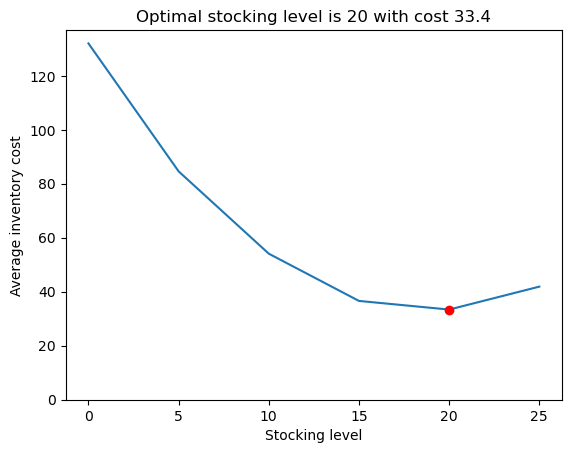

In [7]:
demandList=[10,18,5,20,16,30,15,3,5,10]
levelList=range(0,30,5)
underage=10
overage=3
bestLevel,cost=optBaseStock(levelList,demandList,underage,overage)

import matplotlib.pyplot as plt
levelList=sorted(levelList)
costList=[cost[level] for level in levelList]
plt.plot(levelList,costList)
plt.plot([bestLevel],[cost[bestLevel]],'ro')
plt.title(f'Optimal stocking level is {bestLevel} with cost {round(cost[bestLevel],2)}')
plt.xlabel('Stocking level')
plt.ylabel('Average inventory cost')
plt.ylim(bottom=0)
plt.show()

## Q2. Simulating Availabilities of Hospital Beds

One challenge in health care operations is to forecast the number of hospital beds that are available at a given time, since patients admitted in the past may stay for several days and the number of beds are limited. If no more beds are available, then incoming patients may need to be turned away.

Write a function called `admissionSimulation` with three input arguments:

- `demandList`: a list of positive integers representing the number of incoming patients desiring a hospital bed in each day. (The first number corresponds to day 0, the second number to day 1, and so on.)
- `beds`: a positive integer representing the total number of hospital beds available.
- `stay`: a positive integer representing the number of days each admitted patient will stay. If `stay=1`, then every admitted patient leaves before any incoming patients arrive the next day. If `stay=2`, then each patient admitted on day $t$ will occupy a bed also for day $t+1$, and leave before incoming patients arrive on day $t+2$.

The function should return a list `admissionRecord`, corresponding to the number of incoming patients admitted on each day. 

**Sample run 1:**

```python
demandList=[1,2,1,0,2,3]
beds=2
stay=2
admissionRecord=admissionSimulation(demandList,beds,stay)
print(f'Day\tDemand\tAdmitted')
for i in range(len(demandList)):
    print(f'{i}\t{demandList[i]}\t{admissionRecord[i]}')
```

**Correct output:**

```
Day	  Demand   Admitted
0	    1	    1
1	    2	    1
2	    1	    1
3	    0	    0
4	    2	    2
5	    3	    0
```

**Sample run 2:**

```python
demandList=[5,8,6,8,4,4,8,6,1]
beds=7
stay=3
admissionRecord=admissionSimulation(demandList,beds,stay)
print(f'Day\tDemand\tAdmitted')
for i in range(len(demandList)):
    print(f'{i}\t{demandList[i]}\t{admissionRecord[i]}')
```

**Correct output:**

```
Day	  Demand   Admitted
0	    5	    5
1	    8	    2
2	    6	    0
3	    8	    5
4	    4	    2
5	    4	    0
6	    8	    5
7	    6	    2
8	    1	    0
```

**Sample run 3:**

```python
# Sample run 3
demandList=[5,8,6,4,4,4,8,1,3]
beds=7
stay=3
admissionRecord=admissionSimulation(demandList,beds,stay)
print(f'Day\tDemand\tAdmitted')
for i in range(len(demandList)):
    print(f'{i}\t{demandList[i]}\t{admissionRecord[i]}')
```

**Correct output:**

```
Day      Demand   Admitted
0	    5    	5
1	    8	    2
2	    6	    0
3	    4	    4
4	    4	    3
5	    4	    0
6	    8	    4
7	    1	    1
8	    3	    2
```

**Hint:** In Step 2, you want to create a table. The above tables are insufficient to carry through the logic, as you also need to keep track of the number of discharges at the beginning of each day, as well as the number of available beds before new patients arrive.

### Applying Algorithmic Thinking:

**Step 1. Understand** (Write your summary of the task in this cell:)

Given that a hospital has a fixed number of beds and each patient occupying a bed occupies it for n days, find the patients admitted on each day.

**Step 2. Decompose** (Write your instructions in this Markdown cell)

- Iterate over the demand for each day.
- For a given day, if a bed is available to meet the demand for that day, the patient gets admitted
- The bed stays occupied by each patient for the stipulated number of days before it is free for another patient
- Therefore, subtract the beds that open up after the stay ends from the current number of beds occupied.
- Use this number of occupied beds to determine how many people from the demand can be admitted
- For every day, find the number of incoming patients admitted and output as list

**Step 3. Analyze** (Write code fragments in separate code cells to implement the trickiest steps)

In [8]:
demandList=[1,2,1,0,2,3]
beds=2
stay=2
admitted = []
carry = [0]
for demand in demandList:
    print(demand)

1
2
1
0
2
3


In [9]:
demandList=[1,2,1,0,2,3]
beds=2
stay=2
admitted = []
carry = [0]
print(f'Day\tDemand\tAdmitted\t\tCarry')
for i in range(len(demandList)):
    if i == 0:
        admitted.append(min(beds,demandList[i]))
    elif i < stay:
        carry.append(carry[-1]+admitted[-1])
        if carry[i]>=beds:
            admitted.append(0)
        else:
            if demandList[i]>carry[i]:
                if demandList[i]>beds:
                    admitted.append(min(beds-carry[i],demandList[i]-carry[i]))
                else:
                    admitted.append(max(beds-carry[i],demandList[i]-carry[i]))
            else:
                admitted.append(min(beds-carry[i],demandList[i]))
    else:
        carry.append(carry[-1]+admitted[-1]-admitted[i-stay])
        if carry[i]>=beds:
            admitted.append(0)
        else:    
            if demandList[i]>carry[i]:
                if demandList[i]>beds:
                    admitted.append(min(beds-carry[i],demandList[i]-carry[i]))
                else:
                    admitted.append(max(beds-carry[i],demandList[i]-carry[i]))
            else:
                admitted.append(min(beds-carry[i],demandList[i]))
    print(f'{i}\t{demandList[i]}\t{admitted[i]}\t\t{carry[i]}')
    

Day	Demand	Admitted		Carry
0	1	1		0
1	2	1		1
2	1	1		1
3	0	0		1
4	2	2		0
5	3	0		2


In [10]:
demandList=[5,8,6,8,4,4,8,6,1]
beds=7
stay=3
admitted = []
carry = [0]
print(f'Day\tDemand\tAdmitted\tCarry')
for i in range(len(demandList)):
    if i == 0:
        admitted.append(min(beds,demandList[i]))
        print(f'{i}\t{demandList[i]}\t{admitted[i]}\t\t{carry[i]}')
        continue
    elif i < stay:
        carry.append(carry[-1]+admitted[-1])
    else:
        carry.append(carry[-1]+admitted[-1]-admitted[i-stay])
    if carry[i]>=beds:
        admitted.append(0)
    else:
        if demandList[i]>carry[i]:
            if demandList[i]>beds:
                admitted.append(min(beds-carry[i],demandList[i]-carry[i]))
            else:
                admitted.append(min(beds-carry[i],demandList[i]))
        else:
            admitted.append(min(beds-carry[i],demandList[i]))
    print(f'{i}\t{demandList[i]}\t{admitted[i]}\t\t{carry[i]}')
    

Day	Demand	Admitted	Carry
0	5	5		0
1	8	2		5
2	6	0		7
3	8	5		2
4	4	2		5
5	4	0		7
6	8	5		2
7	6	2		5
8	1	0		7


**Step 4. Synthesize** (Combine your code fragments from Step 3, but do so in an incremental fashion and print intermediate results)

In [11]:
# Version for debugging: with intermediate printing and no function encapsulation
demandList=[5,8,6,8,4,4,8,6,1]
beds=7
stay=3
admitted = []
carry = [0]
print(f'Day\tDemand\tAdmitted\tCarry')
for i in range(len(demandList)):
    if i == 0:
        admitted.append(min(beds,demandList[i]))
        print(f'{i}\t{demandList[i]}\t{admitted[i]}\t\t{carry[i]}')
        continue
    elif i < stay:
        carry.append(carry[-1]+admitted[-1])
    else:
        carry.append(carry[-1]+admitted[-1]-admitted[i-stay])
    if carry[i]>=beds:
        admitted.append(0)
    else:
        if demandList[i]>carry[i]:
            if demandList[i]>beds:
                admitted.append(min(beds-carry[i],demandList[i]-carry[i]))
            else:
                admitted.append(min(beds-carry[i],demandList[i]))
        else:
            admitted.append(min(beds-carry[i],demandList[i]))
    print(f'{i}\t{demandList[i]}\t{admitted[i]}\t\t{carry[i]}')

Day	Demand	Admitted	Carry
0	5	5		0
1	8	2		5
2	6	0		7
3	8	5		2
4	4	2		5
5	4	0		7
6	8	5		2
7	6	2		5
8	1	0		7


In [12]:
# Final code: removing intermediate printing and encapuslating in a function
def admissionSimulation(demandList,beds,stay):
    admitted = []
    carry = [0]
    for i in range(len(demandList)):
        if i == 0:
            admitted.append(min(beds,demandList[i]))
            continue
        elif i < stay:
            carry.append(carry[-1]+admitted[-1])
        else:
            carry.append(carry[-1]+admitted[-1]-admitted[i-stay])
        if carry[i]>=beds:
            admitted.append(0)
        else:
            if demandList[i]>carry[i]:
                if demandList[i]>beds:
                    admitted.append(min(beds-carry[i],demandList[i]-carry[i]))
                else:
                    admitted.append(min(beds-carry[i],demandList[i]))
            else:
                admitted.append(min(beds-carry[i],demandList[i]))
    return(admitted)

In [13]:
# Sample run 1
demandList=[1,2,1,0,2,3]
beds=2
stay=2
admissionRecord=admissionSimulation(demandList,beds,stay)
print(f'Day\tDemand\tAdmitted')
for i in range(len(demandList)):
    print(f'{i}\t{demandList[i]}\t{admissionRecord[i]}')

Day	Demand	Admitted
0	1	1
1	2	1
2	1	1
3	0	0
4	2	2
5	3	0


In [14]:
# Sample run 2
demandList=[5,8,6,8,4,4,8,6,1]
beds=7
stay=3
admissionRecord=admissionSimulation(demandList,beds,stay)
print(f'Day\tDemand\tAdmitted')
for i in range(len(demandList)):
    print(f'{i}\t{demandList[i]}\t{admissionRecord[i]}')

Day	Demand	Admitted
0	5	5
1	8	2
2	6	0
3	8	5
4	4	2
5	4	0
6	8	5
7	6	2
8	1	0


In [15]:
# Sample run 3
demandList=[5,8,6,4,4,4,8,1,3]
beds=7
stay=3
admissionRecord=admissionSimulation(demandList,beds,stay)
print(f'Day\tDemand\tAdmitted')
for i in range(len(demandList)):
    print(f'{i}\t{demandList[i]}\t{admissionRecord[i]}')

Day	Demand	Admitted
0	5	5
1	8	2
2	6	0
3	4	4
4	4	3
5	4	0
6	8	4
7	1	1
8	3	2
